In [55]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_classification

#Read the csv data
data = loadmat('ex6data1.mat')
#data=np.array(data)

#prepare data

X1=np.array(data['X'])
y1=np.array(data['y'])
y2=y1.ravel()
#print(X1)
#print(y2)
#fit the support vector machine
svm_clf = SVC(kernel="linear", C=1E10)
svm_clf.fit(X1, y2)
#svm_clf.support_vectors_



SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

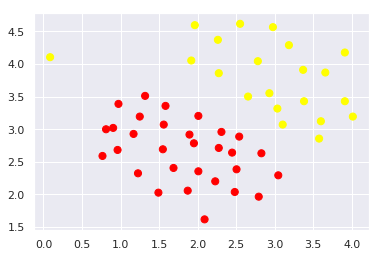

In [56]:
#visualize data
plt.scatter(X1[:, 0], X1[:, 1], c=y2, s=50, cmap='autumn');

In [57]:
print(y2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [58]:
def plot_svc_decision(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(ylim[0], ylim[1], 10)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

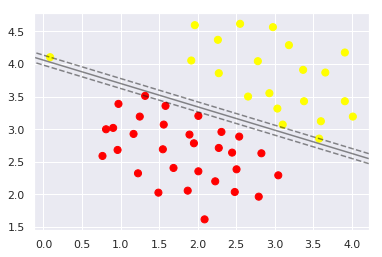

In [59]:

plt.scatter(X1[:, 0], X1[:, 1], c=y2, s=50, cmap='autumn')
plot_svc_decision(svm_clf);

In [60]:
#non linearly seperable
#Read the csv for the second data
data2 = loadmat('ex6data2.mat')
#data=np.array(data)

#prepare data

X2=np.array(data2['X'])
y2=np.array(data2['y'])
y3=y2.ravel()

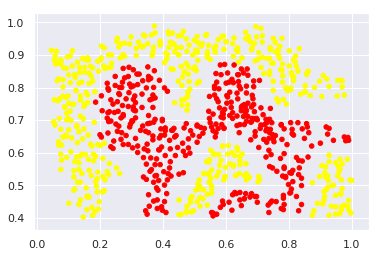

In [61]:
#visualize data
plt.scatter(X2[:, 0], X2[:, 1], c=y3, s=20, cmap='autumn');

In [62]:
#gaussian Kernel
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X2, y3)

/home/ubuntu-eng-01/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

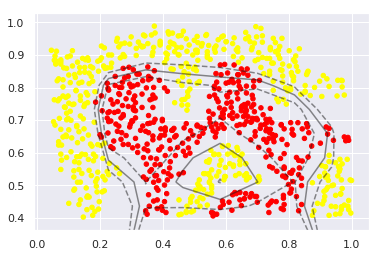

In [64]:
plt.scatter(X2[:, 0], X2[:, 1], c=y3, s=20, cmap='autumn')
plot_svc_decision(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');